In [1]:
import pandas as pd
import numpy as np
import datetime as dt
#Intraday data: (Heavy 4+GB/day filesizes)
#https://iextrading.com/trading/market-data/

import matplotlib.pyplot as plt
#!pip install iexfinance
import iexfinance as iex

%matplotlib inline

In [0]:
import datetime as dt
from iexfinance.stocks import get_historical_data
# import pandas_datareader.data as web


# Day 1 

### Reading CSVs

We should include the following for reading csvs:

In [0]:
# Set the path and read the file
# Note: the import statement here needs moved to the beginning of the file. 
# I'm just adding it here to group it with the activity
from pathlib import Path
sp500_csv = Path('SP500_Price_History.csv')
sp500=pd.read_csv(sp500_csv)

# Convert the dates to a datetimeindex
sp500.columns=['Date', 'SP500 Price']
sp500=sp500.set_index(pd.to_datetime(sp500['Date'], infer_datetime_format=True))
del(sp500['Date'])
sp500.head()

,SP500 Price
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [0]:
sp500.head()

,Exchange Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06


---

### Data Cleaning

Notes:
We may want to show `astype`

In [0]:
sp500.dtypes

SP500 Price    float64
dtype: object

---

### Returns

In [0]:
sp500['SP500 Price']=sp500['SP500 Price'].apply(pd.to_numeric, errors='coerce')
sp500['SP500 Price'].tail()

Date
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: SP500 Price, dtype: float64

In [0]:
daily_returns = sp500.pct_change()
daily_returns.head()

,SP500 Price
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [0]:
daily_returns = sp500 / sp500.shift(1) - 1
daily_returns.head()

,SP500 Price
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [0]:
periodic_returns = sp500 / sp500.shift(7) - 1
periodic_returns.head()

,SP500 Price
Date,
2019-04-23,NaN
2019-04-22,NaN
2019-04-18,NaN
2019-04-17,NaN
2019-04-16,NaN


---

### Pandas Visualization

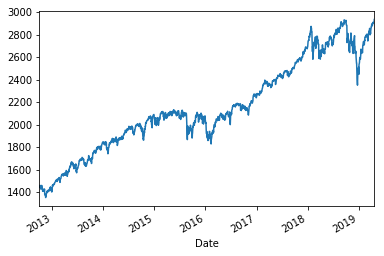

In [0]:
sp500['SP500 Price'].plot()

# Day 2  

### Instructor Demo: IEX Data

I'm still not sure if we should have them use the API/SDK yet vs reading the csv

In [0]:
# A Sample stock data call using iexfinance
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2018, 1, 1)
df = get_historical_data(["GOOG","TSLA"], start, end,  output_format='pandas')

df.head()

GOOG                                         TSLA          \
              open      high       low   close   volume    open    high   
date                                                                      
2017-01-03  778.81  789.6300  775.8000  786.14  1657268  214.86  220.33   
2017-01-04  788.36  791.3400  783.1600  786.90  1072958  214.75  228.00   
2017-01-05  786.08  794.4800  785.0200  794.02  1335167  226.42  227.48   
2017-01-06  795.26  807.9000  792.2041  806.15  1640170  226.93  230.31   
2017-01-09  806.40  809.9664  802.8300  806.65  1274645  228.97  231.92   

                                      
               low   close    volume  
date                                  
2017-01-03  210.96  216.99   5923254  
2017-01-04  214.31  226.99  11213471  
2017-01-05  221.95  226.75   5911695  
2017-01-06  225.45  229.01   5527893  
2017-01-09  228.00  231.28   3979484

In [0]:
# Show how to index into the multiindex dataframe
df['GOOG'].head()

,open,high,low,close,volume
date,,,,,
2017-01-03,778.81,789.6300,775.8000,786.14,1657268
2017-01-04,788.36,791.3400,783.1600,786.90,1072958
2017-01-05,786.08,794.4800,785.0200,794.02,1335167
2017-01-06,795.26,807.9000,792.2041,806.15,1640170
2017-01-09,806.40,809.9664,802.8300,806.65,1274645


In [0]:
# This is now in day 1, but we can show this here as part of the multiindex example
# However, we don't have to explain the formulas here. 


# #Explain time shifts and basic formula
# #Two ways to do it: 'shift()' or 'pct_change()'

# 'shift()' means Ending Price/Beginning Price - 1 
# Beginning Price is found by the shift() lookback function

# daily profit or loss
df['GOOG']['close']/df['GOOG']['close'].shift(1)-1
df['GOOG']['close'].pct_change()

# #7-day (rolling) profit or loss
# df['GOOG']['close']/df['GOOG']['close'].shift(7)-1
# df['GOOG']['close'].pct_change(7)


date
2017-01-03         NaN
2017-01-04    0.000967
2017-01-05    0.009048
2017-01-06    0.015277
2017-01-09    0.000620
2017-01-10   -0.002306
2017-01-11    0.003877
2017-01-12   -0.001919
2017-01-13    0.001885
2017-01-17   -0.004048
2017-01-18    0.001815
2017-01-19   -0.004832
2017-01-20    0.003547
2017-01-23    0.017751
2017-01-24    0.005566
2017-01-25    0.014323
2017-01-26   -0.004212
2017-01-27   -0.010623
2017-01-30   -0.025495
2017-01-31   -0.006893
2017-02-01   -0.001374
2017-02-02    0.003563
2017-02-03    0.003707
2017-02-06   -0.000187
2017-02-07    0.007026
2017-02-08    0.001747
2017-02-09    0.001460
2017-02-10    0.005077
2017-02-13    0.006846
2017-02-14    0.001477
                ...   
2017-11-16    0.011353
2017-11-17   -0.012988
2017-11-20   -0.000697
2017-11-21    0.015819
2017-11-22    0.001421
2017-11-24    0.004489
2017-11-27    0.013069
2017-11-28   -0.006450
2017-11-29   -0.024584
2017-11-30   -0.000245
2017-12-01   -0.011004
2017-12-04   -0.011374
2017-1

In [0]:
# First, we need to get a list of potential stocks we can get from iex:
# Returns array of all symbols that IEX Cloud supports for API calls
tickers=pd.DataFrame(iex.refdata.get_symbols())  

In [0]:
tickers.head()

,date,iexId,isEnabled,name,symbol,type
0,2019-05-02,2,True,Agilent Technologies Inc.,A,cs
1,2019-05-02,12042,True,Alcoa Corporation,AA,cs
2,2019-05-02,14924,True,Perth Mint Physical Gold,AAAU,N/A
3,2019-05-02,7653,True,Altaba Inc.,AABA,cs
4,2019-05-02,9169,True,AAC Holdings Inc.,AAC,cs


In [0]:
# More than just stocks came back. Let's see what's there:
# Drop duplicate values in the 'type' column to see whats-what
tickers.type.drop_duplicates() #we want stock, common stock, 'cs'

0           cs
2          N/A
5           et
34          ps
44          su
115         bo
8732    crypto
Name: type, dtype: object

In [0]:
# Filter down to common stock only
print(tickers[tickers['type'] ==' cs'].shape)
tickers[tickers['type'] == 'cs'].head()

(0, 6)


,date,iexId,isEnabled,name,symbol,type
0,2019-05-02,2,True,Agilent Technologies Inc.,A,cs
1,2019-05-02,12042,True,Alcoa Corporation,AA,cs
3,2019-05-02,7653,True,Altaba Inc.,AABA,cs
4,2019-05-02,9169,True,AAC Holdings Inc.,AAC,cs
6,2019-05-02,8148,True,American Airlines Group Inc.,AAL,cs


NOTE: Chris mentioned that we need to sample here because of the limitations with the API. We can either have them sample the dataframe or we can have them create a list and slice n tickers. Both options are below

In [0]:
# For size reasons, we can filter down to a smaller subset, say 100 firms 
example_tickers = tickers['symbol'].sample(100)
len(example_tickers)

100

In [0]:
# Turn those symbols into a list
list_of_tickers=list(tickers['symbol'].drop_duplicates())
list_of_tickers[0:5] #preview the list

['A', 'AA', 'AAAU', 'AABA', 'AAC']

In [0]:
# preview the list
list_of_tickers[0:10]

['ECF', 'FV', 'TI', 'NRO', 'HUD', 'LTM', 'BCI', 'MRVL', 'BPMC', 'SPCB']

---

##### Standard Deviation

In [0]:
# Daily Standard Deviation
print('Daily Standard Deviation, ', 'Google:',
      df['GOOG']['close'].pct_change(1).std()  )

In [0]:
#Annual Standard Deviation 
#(There are 252 trading days in a U.S. Calendar year)
print('Annual Standard Deviation, ', 'Google:',
df['GOOG']['close'].pct_change(1).std()*np.sqrt(252)  )

Daily Standard Deviation,  Google: 0.009695899160476047
Annual Standard Deviation,  Google: 0.153917627495


In [0]:
#Daily Standard Deviation (S&P 500)
print('Daily Standard Deviation, ', 'S&P 500:',
      sp500.pct_change(1).std()  )

In [0]:
#Annual Standard Deviation (S&P 500) 
#(There are 252 trading days in a U.S. Calendar year)
print('Annual Standard Deviation, ', 'S&P 500:',
sp500.pct_change(1).std() * np.sqrt(252)  )

Daily Standard Deviation,  S&P 500: SP500 Price    0.008135
dtype: float64
Annual Standard Deviation,  S&P 500: SP500 Price    0.129133
dtype: float64


#### Rolling Standard Deviation 

In [0]:
#Let's add Google and SP500 together to a dataframe and compare:

#Make it empty, but have the same index as Google 
prices=pd.DataFrame(index=df['GOOG']['close'].index)
#Add in Google's data 
prices['Google'] = df['GOOG']['close']
# #Add in the S&P 500 data
prices['S&P 500'] = sp500['SP500 Price']
prices.head(10)

,Google,S&P 500
date,,
2017-01-03,786.14,2257.83
2017-01-04,786.90,2270.75
2017-01-05,794.02,2269.00
2017-01-06,806.15,2276.98
2017-01-09,806.65,2268.90
2017-01-10,804.79,2268.90
2017-01-11,807.91,2275.32
2017-01-12,806.36,2270.44
2017-01-13,807.88,2274.64


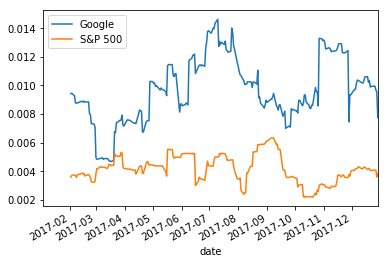

In [0]:
#21-day rolling window of data to use to calculate std
#This is a 'Moving Average Window'.
prices.pct_change(1).rolling(21).std().plot()
#Notice that the S&P 500 (which is a big basket of diversified stocks),
#Has lower volatility.


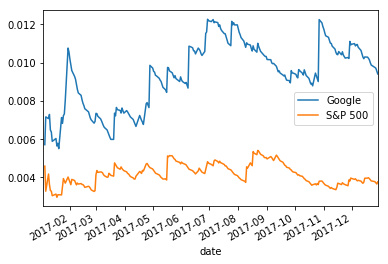

In [0]:
#An alternative way to calculate a rolling window is 
#via an 'exponentially weighted moving average'. This is 
#like a moving window average, but it assigns greater importance
#to more recent observations.

prices.pct_change().ewm(halflife=21).std().plot()

#### Sharpe Ratio 

In [0]:
# prices.pct_change().ewm(halflife=21).std()
daily_returns=prices.pct_change()
daily_returns.head()


,Google,S&P 500
date,,
2017-01-03,NaN,NaN
2017-01-04,0.000967,0.005722
2017-01-05,0.009048,-0.000771
2017-01-06,0.015277,0.003517
2017-01-09,0.000620,-0.003549


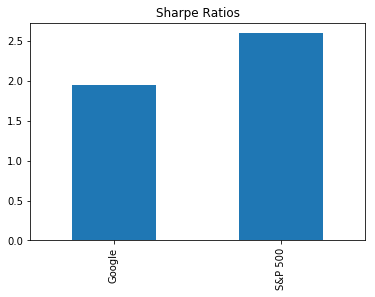

In [0]:
#Annual Sharpe
sharpe_ratios=( (daily_returns.mean()*252)
        / (daily_returns.std()*np.sqrt(252))   )
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')


#### Introducting Correlation and Beta 

In [0]:
daily_returns.head()

,Google,S&P 500
date,,
2017-01-03,NaN,NaN
2017-01-04,0.000967,0.005722
2017-01-05,0.009048,-0.000771
2017-01-06,0.015277,0.003517
2017-01-09,0.000620,-0.003549


In [0]:
correlations=daily_returns.corr()
correlations

,Google,S&P 500
Google,1.000000,0.540271
S&P 500,0.540271,1.000000


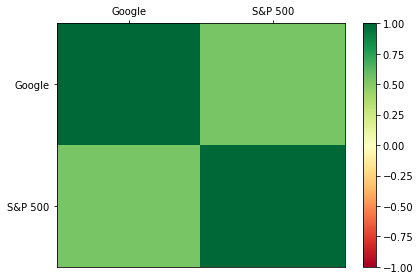

In [0]:
#Heatmap of Correlation
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
heatmap = ax.pcolor(correlations.values, cmap=plt.cm.RdYlGn)
fig.colorbar(heatmap)
ax.set_xticks(np.arange(correlations.values.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(correlations.values.shape[1])+0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()

column_labels = correlations.columns
row_labels = correlations.index

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)

heatmap.set_clim(-1,1)
plt.tight_layout()

#### Rolling Correlation 

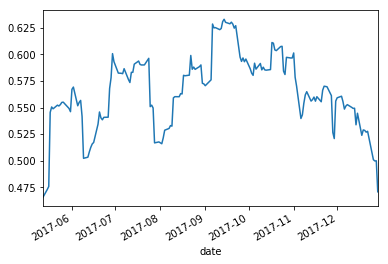

In [0]:
rolling_correlation=daily_returns['Google'].rolling(window=90).corr(daily_returns['S&P 500'])
rolling_correlation=rolling_correlation.dropna()
rolling_correlation.plot()

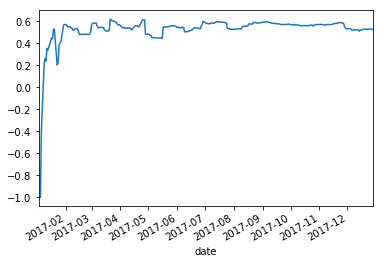

In [0]:

daily_returns['Google'].ewm(halflife=90).corr(daily_returns['S&P 500']).plot()

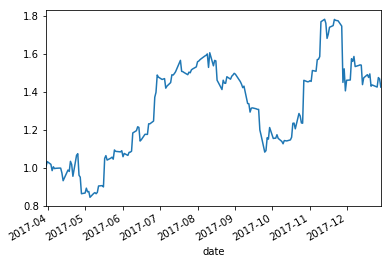

In [0]:
covariance=daily_returns['Google'].rolling(window=60).cov(daily_returns['S&P 500'])
variance=daily_returns['S&P 500'].rolling(window=60).var()
(covariance/variance).dropna().plot()

#### The Difference Between Correlation and Beta 

Correlation measures the strength of the connection between the two variables. The less 'scattershot' the two, the more the correlation. 

On the other hand, Beta is the slope of that line which best describes the relationship between the two variables. 

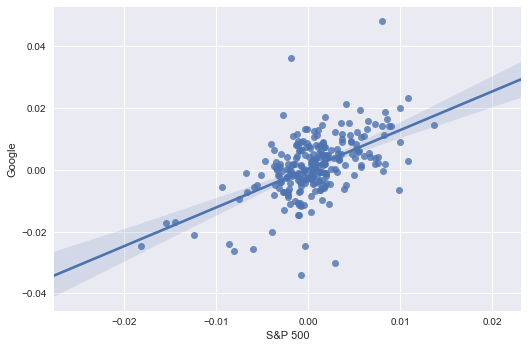

In [0]:
import seaborn as sns
sns.lmplot(x='S&P 500', y='Google', data=daily_returns,aspect=1.5, fit_reg=True)
sns.lmplot?

# Day 3 

##### Pulling multiple stock data via the IEX API. Some real-world data cleaning (nans, datetime introduction, and dataframe.xs() ) and grouping at the dataframe level is introduced. 

In [0]:
#This code snippet was also used for previous days. This is to collect the IEX data. 

#First, we need to get a list of potential stocks we can get from iex:
#Returns array of all symbols that IEX Cloud supports for API calls
tickers=pd.DataFrame(iex.refdata.get_symbols())  

tickers.head()

#More than just stocks came back. Let's see what's there:
#Drop duplicate values in the 'type' column to see whats-what
tickers.type.drop_duplicates() #we want stock, common stock, 'cs'

#Filter down to common stock only
print(tickers[tickers['type']=='cs'].shape)
tickers[tickers['type']=='cs'].head()

#Turn those symbols into a list
list_of_tickers=list(tickers['symbol'].drop_duplicates())
list_of_tickers[0:5] #preview the list

#For size reasons, we can filter down to a smaller subset, say 500 firms 
import random
list_of_tickers=random.sample(list_of_tickers, 500)
len(list_of_tickers)

#preview the list
list_of_tickers[0:10]


(5436, 6)


['DEUR', 'PULM', 'WBIY', 'TZA', 'CYRXW', 'FSBC', 'ANAT', 'PAI', 'OXLC', 'FEZ']

In [0]:
#There is a limit of 100 tickers per call. We may want to loop/dataframe append it?
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2019, 4, 15)
df = get_historical_data(list_of_tickers[400:500], start, end,  output_format='pandas')
df.head()

UYG                                        WEYS           \
               open     high      low    close  volume     open     high   
date                                                                       
2018-01-02  42.5025  42.7261  41.6540  41.8908  242229  29.5345  31.1763   
2018-01-03  41.8974  42.3179  41.8743  42.2065   88884  30.3079  30.5109   
2018-01-04  42.6011  43.2194  42.5880  42.6307  162006  29.6118  31.5449   
2018-01-05  42.9728  43.0040  42.5390  42.9892   49689  31.3230  31.8933   
2018-01-08  42.8938  43.1142  42.8111  43.0352   46614  30.9363  30.9363   

                                     ...   GEOS                                \
                low    close volume  ...   open    high    low   close volume   
date                                 ...                                        
2018-01-02  29.2831  30.1725  81768  ...  13.08  13.650  13.04  13.505  36922   
2018-01-03  28.3581  29.4861  79864  ...  13.55  13.820  13.38  13.670  31868   
2018-01-04  29.5828  31.2746  53135  ...  13.70  14.440  13.45  14.370  76767   
2018-01-05  30.0244  31.3036  41847  ...  14.36  14.645  14.04  14.520  34399   
2018-01-08  29.5151  29.8728  59282  ...  14.45  14.520  14.31  14.480  16367   

               RECN                                     
               open     high      low    close  volume  
date                                                    
2018-01-02  14.8009  15.3295  14.6933  15.0412  171946  
2018-01-03  14.9931  14.9931  14.3684  14.6567  250680  
2018-01-04  14.8970  15.2334  14.5606  14.9931  324897  
2018-01-05  14.9931  15.3824  14.9259  15.1373  183535  
2018-01-08  15.1373  15.8581  15.0412  15.8581  227225  

[5 rows x 500 columns]

In [0]:
#Cut it down to just the 'closing price' column, 'close', where the cut is across columns (axis=1), and
#we're pulling from the second level of columns, where 'close' is located (level=1)
closing_prices=df.xs( level=1, axis=1, key='close')
closing_prices

,UYG,WEYS,IYG,COM,CCLP,TBK,SEED,ZUMZ,LOMA,GYC,...,LTRPA,CDEV,BRID,SIG,FFG,CRNT,CVCO,AQN,GEOS,RECN
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,41.8908,30.1725,128.2150,23.8488,4.9596,32.850,9.1000,20.00,24.80,23.0000,...,9.45,20.000,12.5500,52.0705,65.2603,2.030,150.25,10.4536,13.505,15.0412
2018-01-03,42.2065,29.4861,128.6854,24.0045,5.1692,32.500,9.3100,20.50,24.15,22.5550,...,9.55,20.330,12.5500,51.6090,65.2139,2.020,153.60,10.1340,13.670,14.6567
2018-01-04,42.6307,31.2746,130.1260,24.0831,5.2740,32.500,9.5210,22.95,24.45,23.5000,...,9.40,20.370,12.5500,52.5508,65.7712,2.120,153.90,10.0212,14.370,14.9931
2018-01-05,42.9892,31.3036,130.8022,23.9661,5.2041,32.550,10.0010,22.55,24.18,23.4000,...,9.40,20.120,12.5500,53.6150,66.4680,2.110,156.85,10.2186,14.520,15.1373
2018-01-08,43.0352,29.8728,130.6552,23.9563,5.1517,32.900,9.4800,23.00,23.71,NaN,...,9.35,20.220,12.5000,54.0953,65.7712,2.080,161.90,10.2374,14.480,15.8581
2018-01-09,43.2819,30.0759,131.7234,24.1123,5.2827,33.600,8.6000,22.05,23.57,23.2793,...,9.25,20.070,12.7500,53.2948,65.1210,2.080,162.75,10.1152,14.280,15.9542
2018-01-10,43.5680,30.2402,132.6936,24.1513,5.2740,34.350,8.9510,22.20,23.71,23.3249,...,9.30,19.810,12.5100,49.6219,65.8641,2.060,158.15,10.0212,14.340,16.0023
2018-01-11,43.9462,30.8976,133.5168,24.3140,6.3742,35.850,9.0520,22.40,24.64,23.1000,...,9.65,20.290,12.8100,52.0046,68.1866,2.080,161.00,9.9648,15.390,16.1945
2018-01-12,44.4461,30.7719,134.6732,24.3177,6.1122,35.450,9.1000,22.90,25.00,NaN,...,10.10,20.290,13.7600,53.6244,68.7440,2.150,163.25,9.9460,15.190,15.9542


In [0]:

#Remove columns (axis=1) that have 50 or more missing observations 
closing_prices=closing_prices.dropna(axis=1, thresh=50)
print(closing_prices.shape)
closing_prices

(323, 99)


,UYG,WEYS,IYG,COM,CCLP,TBK,SEED,ZUMZ,LOMA,GYC,...,LTRPA,CDEV,BRID,SIG,FFG,CRNT,CVCO,AQN,GEOS,RECN
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,41.8908,30.1725,128.2150,23.8488,4.9596,32.850,9.1000,20.00,24.80,23.0000,...,9.45,20.000,12.5500,52.0705,65.2603,2.030,150.25,10.4536,13.505,15.0412
2018-01-03,42.2065,29.4861,128.6854,24.0045,5.1692,32.500,9.3100,20.50,24.15,22.5550,...,9.55,20.330,12.5500,51.6090,65.2139,2.020,153.60,10.1340,13.670,14.6567
2018-01-04,42.6307,31.2746,130.1260,24.0831,5.2740,32.500,9.5210,22.95,24.45,23.5000,...,9.40,20.370,12.5500,52.5508,65.7712,2.120,153.90,10.0212,14.370,14.9931
2018-01-05,42.9892,31.3036,130.8022,23.9661,5.2041,32.550,10.0010,22.55,24.18,23.4000,...,9.40,20.120,12.5500,53.6150,66.4680,2.110,156.85,10.2186,14.520,15.1373
2018-01-08,43.0352,29.8728,130.6552,23.9563,5.1517,32.900,9.4800,23.00,23.71,NaN,...,9.35,20.220,12.5000,54.0953,65.7712,2.080,161.90,10.2374,14.480,15.8581
2018-01-09,43.2819,30.0759,131.7234,24.1123,5.2827,33.600,8.6000,22.05,23.57,23.2793,...,9.25,20.070,12.7500,53.2948,65.1210,2.080,162.75,10.1152,14.280,15.9542
2018-01-10,43.5680,30.2402,132.6936,24.1513,5.2740,34.350,8.9510,22.20,23.71,23.3249,...,9.30,19.810,12.5100,49.6219,65.8641,2.060,158.15,10.0212,14.340,16.0023
2018-01-11,43.9462,30.8976,133.5168,24.3140,6.3742,35.850,9.0520,22.40,24.64,23.1000,...,9.65,20.290,12.8100,52.0046,68.1866,2.080,161.00,9.9648,15.390,16.1945
2018-01-12,44.4461,30.7719,134.6732,24.3177,6.1122,35.450,9.1000,22.90,25.00,NaN,...,10.10,20.290,13.7600,53.6244,68.7440,2.150,163.25,9.9460,15.190,15.9542


In [0]:
#Get end of week prices

weekly_prices=closing_prices.groupby(by=[closing_prices.index.year, closing_prices.index.week]).last()
weekly_prices

UYG     WEYS       IYG      COM    CCLP    TBK     SEED  \
date date                                                                
2018 1     32.5602  28.9605  111.7825  23.9226  2.3036  29.70   5.1700   
     2     44.4461  30.7719  134.6732  24.3177  6.1122  35.45   9.1000   
     3     45.2734  31.1876  136.2511  24.3709  5.9376  36.00  12.0980   
     4     47.0573  32.4928  138.6619  24.4534  6.0075  38.50  11.3000   
     5     44.5645  29.2058  135.4474  24.0629  5.8551  38.35  10.8000   
     6     39.8485  28.8868  128.3816  23.1766  5.5313  38.60   9.5020   
     7     43.4101  29.7278  135.0064  23.6055  5.8731  40.60   9.1000   
     8     43.4726  30.1145  135.6140  23.9401  6.9434  41.25   8.7060   
     9     41.6573  30.2209  132.9876  23.6454  6.8714  42.25   8.5970   
     10    45.1696  31.9030  138.4267  23.7809  6.7635  43.00   8.6000   
     11    43.8508  31.5852  135.4082  23.6693  6.6376  43.60  12.7000   
     12    38.3663  31.3710  125.3030  23.6835  6.6736  40.70   8.4880   
     13    40.5457  32.7045  128.7134  23.8200  6.5297  41.20   7.7030   
     14    39.3342  33.6584  126.6691  23.7100  6.2688  39.40   6.7760   
     15    39.9103  34.5539  128.1336  24.1123  6.6196  39.25   7.7780   
     16    40.7662  35.8485  130.1484  24.1610  6.8445  39.50   6.9511   
     17    40.8617  36.2865  129.6668  24.3850  6.6826  39.25   7.0180   
     18    40.3416  35.9069  128.9002  24.7361  6.7541  39.35   6.4290   
     19    42.7086  31.0985  134.1879  24.6507  6.0159  39.65   6.5730   
     20    41.5794  32.7629  132.7038  24.9992  5.7760  40.55   6.8800   
     21    41.7868  33.5239  132.5564  25.2136  5.3608  40.25   7.3400   
     22    41.2831  35.1506  131.2000  25.1162  5.3055  41.85   7.2170   
     23    43.0411  34.8371  134.4041  24.7507  5.3101  42.25   7.9070   
     24    41.7473  35.7386  131.9961  24.1496  5.0379  41.40   7.2990   
     25    41.2444  36.4540  130.7676  24.1436  5.0286  41.60   7.8505   
     26    40.0074  35.6700  127.8811  24.4074  5.1486  40.75   7.6790   
     27    40.6407  36.4834  128.4336  24.3683  5.0425  42.00   8.2000   
     28    41.3235  35.9444  129.8839  24.3292  5.2224  41.00   8.2700   
     29    42.4318  36.6500  132.8929  24.2403  5.4992  39.20  10.4000   
     30    43.3224  34.0531  134.8267  24.4816  5.3885  38.55   9.7200   
...            ...      ...       ...      ...     ...    ...      ...   
     39    42.9222  34.6855  131.9864  24.6541  4.9070  38.20   5.2600   
     40    42.9321  30.8009  132.7291  24.9795  5.2691  38.24   6.2900   
     41    38.6964  30.9487  125.7876  24.7192  5.2214  35.28   5.5400   
     42    39.3908  29.9234  126.0550  24.5659  4.6688  35.60   6.9500   
     43    36.1967  29.8346  120.1137  24.2621  4.5354  33.92   7.9900   
     44    38.6567  31.4319  125.2628  23.9436  4.5874  36.77   7.3230   
     45    40.8391  32.9896  127.7184  23.8900  5.5406  37.54   7.4100   
     46    39.9364  33.0291  125.9659  23.7624  4.6767  37.00   7.0500   
     47    37.7640  33.0291  121.8960  23.7722  4.3391  37.02   7.9800   
     48    40.6506  32.8822  127.2927  23.8408  4.1604  38.28   7.8200   
     49    36.5637  30.2810  118.8151  23.8408  4.1803  34.77   7.3500   
     50    34.4211  30.3405  114.4199  23.8065  3.4554  32.95   6.9500   
     51    30.3639  29.6456  106.7644  23.8604  2.5022  28.02   5.4900   
     52    32.0112  29.3874  110.8267  23.9575  2.2639  29.62   4.9000   
2019 1     33.3787  28.5038  115.1877  23.9221  2.6412  30.32   5.6000   
     2     34.7362  28.1464  116.8604  24.0469  2.9391  30.63   6.1500   
     3     38.0302  28.0174  123.8698  24.0019  2.9590  32.22   6.3700   
     4     38.1899  26.9749  124.1187  24.1193  2.5320  30.86   6.2500   
     5     39.0683  26.8359  123.9793  24.2720  2.6313  30.88   6.2000   
     6     38.6390  27.1040  123.0633  24.2459  2.5317  30.41   6.7000   
     7     40.5455  28.2854  126.9364  24.3073  2.6712  33.10   6.5000   
     8     40.7052 

In [0]:
#Construct Portfolio Using Momentum Algorithm

In [0]:
weekly_prices.head()

UYG     WEYS       IYG      COM    CCLP    TBK    SEED   ZUMZ  \
date date                                                                      
2018 1     32.5602  28.9605  111.7825  23.9226  2.3036  29.70   5.170  19.17   
     2     44.4461  30.7719  134.6732  24.3177  6.1122  35.45   9.100  22.90   
     3     45.2734  31.1876  136.2511  24.3709  5.9376  36.00  12.098  23.10   
     4     47.0573  32.4928  138.6619  24.4534  6.0075  38.50  11.300  22.35   
     5     44.5645  29.2058  135.4474  24.0629  5.8551  38.35  10.800  20.55   

            LOMA      GYC  ...  LTRPA   CDEV     BRID      SIG      FFG  CRNT  \
date date                  ...                                                  
2018 1     11.13  19.8621  ...  15.89  11.02  19.8700  30.7897  63.7947  3.78   
     2     25.00  23.1000  ...  10.10  20.29  13.7600  53.6244  68.7440  2.15   
     3     24.65  22.7700  ...   9.55  20.78  15.0308  51.8633  68.3724  2.17   
     4     24.09  22.6400  ...   9.75  20.54  16.3501  52.0799  66.7931  2.18   
     5     22.99  22.9150  ...   8.50  19.65  16.4994  48.6639  65.0281  2.09   

             CVCO      AQN   GEOS     RECN  
date date                                   
2018 1     130.38   9.9368  10.31  14.0902  
     2     163.25   9.9460  15.19  15.9542  
     3     164.20  10.3502  15.00  15.7139  
     4     159.60  10.3502  14.43  15.9542  
     5     151.35   9.8050  13.74  15.6178  

[5 rows x 99 columns]

#### Using groupby() and qcut() to assemble stocks into portfolios based on a simple algorithmic strategy (e.g., momentum)

In [0]:
#lookback-week returns
#A Momentum strategy skips the most recent week when looking at recent price movement.

#IMPORTANT: We're using only *Past* information to build this strategy! Otherwise it would not be realistic.
lookback_window=4    # 3 = 3 weeks
lookback_returns = (weekly_prices.shift(1) / weekly_prices.shift(1+lookback_window) )-1
lookback_returns

UYG      WEYS       IYG       COM      CCLP       TBK  \
date date                                                               
2018 1          NaN       NaN       NaN       NaN       NaN       NaN   
     2          NaN       NaN       NaN       NaN       NaN       NaN   
     3          NaN       NaN       NaN       NaN       NaN       NaN   
     4          NaN       NaN       NaN       NaN       NaN       NaN   
     5          NaN       NaN       NaN       NaN       NaN       NaN   
     6     0.368680  0.008470  0.211705  0.005865  1.541717  0.291246   
     7    -0.103442 -0.061260 -0.046718 -0.046925 -0.095039  0.088858   
     8    -0.041157 -0.046807 -0.009135 -0.031406 -0.010863  0.127778   
     9    -0.076177 -0.073195 -0.021981 -0.020991  0.155789  0.071429   
     10   -0.065236  0.034757 -0.018161 -0.017350  0.173575  0.101695   
     11    0.133533  0.104414  0.078244  0.026074  0.222769  0.113990   
     12    0.010152  0.062480  0.002976  0.002703  0.130170  0.073892   
     13   -0.117460  0.041724 -0.076032 -0.010718 -0.038857 -0.013333   
     14   -0.026684  0.082182 -0.032140  0.007384 -0.049728 -0.024852   
     15   -0.129189  0.055023 -0.084937 -0.002981 -0.073143 -0.083721   
     16   -0.089862  0.093990 -0.053723  0.018716 -0.002712 -0.099771   
     17    0.062552  0.142727  0.038669  0.020162  0.025608 -0.029484   
     18    0.007794  0.109526  0.007407  0.023720  0.023416 -0.047330   
     19    0.025611  0.066804  0.017614  0.043277  0.077415 -0.001269   
     20    0.070115 -0.100000  0.047250  0.022329 -0.091199  0.010191   
     21    0.019948 -0.086073  0.019635  0.034692 -0.156111  0.026582   
     22    0.022640 -0.076133  0.022285  0.033980 -0.197797  0.025478   
     23    0.023338 -0.021063  0.017842  0.015366 -0.214477  0.063532   
     24    0.007785  0.120218  0.001611  0.004057 -0.117322  0.065574   
     25    0.004038  0.090825 -0.005333 -0.033985 -0.127787  0.020962   
     26   -0.012980  0.087403 -0.013495 -0.042437 -0.061968  0.033540   
     27   -0.030901  0.014776 -0.025296 -0.028221 -0.029573 -0.026284   
     28   -0.055770  0.047257 -0.044422 -0.015450 -0.050395 -0.005917   
     29   -0.010152  0.005758 -0.016002  0.007437  0.036622 -0.009662   
     30    0.028789  0.005377  0.016252  0.004005  0.093585 -0.057692   
...             ...       ...       ...       ...       ...       ...   
     39    0.029707 -0.073394  0.013130 -0.000402 -0.128321 -0.008333   
     40   -0.041211 -0.008175 -0.029868  0.005678 -0.128589 -0.100118   
     41   -0.031357 -0.152469 -0.015990  0.026733  0.001825 -0.107585   
     42   -0.127117 -0.138586 -0.064990  0.015926  0.033961 -0.195439   
     43   -0.136511 -0.140468 -0.080070  0.008514 -0.063111 -0.145258   
     44   -0.156690 -0.139854 -0.089954 -0.015900 -0.075729 -0.112042   
     45   -0.099585  0.020486 -0.056252 -0.041470 -0.129377 -0.038441   
     46    0.055372  0.065945  0.015350 -0.033545  0.061133  0.064059   
     47    0.013851  0.103788 -0.000707 -0.032708  0.001692  0.039326   
     48    0.043300  0.107074  0.014838 -0.020192 -0.043282  0.091392   
     49    0.051580  0.046141  0.016205 -0.004293 -0.093081  0.041066   
     50   -0.104689 -0.082105 -0.069710 -0.002059 -0.245515 -0.073788   
     51   -0.138102 -0.081401 -0.091660  0.001856 -0.261146 -0.109459   
     52   -0.195956 -0.102440 -0.124135  0.003710 -0.423337 -0.243112   
2019 1    -0.212528 -0.106282 -0.129355  0.004895 -0.455846 -0.226228   
     2    -0.087108 -0.058690 -0.030530  0.003410 -0.368179 -0.127984   
     3     0.009154 -0.072316  0.021329  0.010098 -0.149418 -0.070410   
     4     0.252481 -0.054922  0.160216  0.005930  0.182559  0.149893   
     5     0.193017 -0.082093  0.119935  0.006754  0.118424  0.041864   
     6     0.170456 -0.058515  0.076324  0.014627 -0.003748  0.018470   
     7     0.112355 -0.037035  0.053080  0.008275 -0.138614 -0.007183   
     8     0.066140  0.009565  0.024757  0.012724 -0.097263  0.027312   
 

In [0]:
#Group firms into portfolios, by first grouping them into 'buckets':

#First, specify the amount of bins
bin_num=5

#Remove those with more than [thresh] total missing values
lookback_returns.dropna(axis=0, thresh=75, inplace=True)

#Apply, within each date (i.e., across all the columns (axis=1) ), the qcut function.
#Qcut sorts these stocks into bins--10 exhibiting the most positive values (in this case high momentum)
#and bin 1 exhibiting the most negative values (in this case negative momentum)
#the 'labels' argument is to ascribe a customized name to each bin (in this case we're just using 1 through 10)
rankings_df=lookback_returns.apply(
    lambda x: pd.qcut(x, bin_num, labels=list(range(1,bin_num+1)), duplicates='drop', retbins=False),
    axis=1)
rankings_df.tail()

UYG  WEYS  IYG  COM  CCLP  TBK  SEED  ZUMZ  LOMA  GYC  ...  LTRPA  \
date date                                                         ...          
2019 12    4.0   5.0  4.0  3.0   5.0  1.0   4.0   3.0   5.0  3.0  ...    1.0   
     13    2.0   5.0  2.0  3.0   4.0  1.0   5.0   1.0   3.0  3.0  ...    1.0   
     14    2.0   4.0  2.0  3.0   1.0  1.0   5.0   3.0   3.0  4.0  ...    2.0   
     15    5.0   4.0  3.0  2.0   4.0  2.0   5.0   5.0   1.0  2.0  ...    4.0   
     16    4.0   4.0  3.0  2.0   3.0  3.0   5.0   5.0   1.0  3.0  ...    4.0   

           CDEV  BRID  SIG  FFG  CRNT  CVCO  AQN  GEOS  RECN  
date date                                                     
2019 12     1.0   2.0  5.0  3.0   1.0   1.0  5.0   1.0   2.0  
     13     1.0   5.0  3.0  2.0   1.0   1.0  4.0   1.0   2.0  
     14     2.0   2.0  2.0  1.0   2.0   1.0  5.0   1.0   2.0  
     15     4.0   4.0  3.0  1.0   1.0   3.0  3.0   1.0   1.0  
     16     4.0   4.0  1.0  1.0   4.0   5.0  4.0   1.0   1.0  

[5 rows x 99 columns]

In [0]:
#Alternatively, would could use percentiles instead of bins:
 lookback_returns.rank(axis=1, pct=True)

UYG      WEYS       IYG       COM      CCLP       TBK  \
date date                                                               
2018 6     0.730337  0.280899  0.595506  0.269663  0.932584  0.674157   
     7     0.303371  0.516854  0.595506  0.584270  0.348315  0.977528   
     8     0.460674  0.426966  0.707865  0.539326  0.696629  0.955056   
     9     0.370787  0.382022  0.629213  0.651685  0.966292  0.921348   
     10    0.213483  0.808989  0.516854  0.528090  0.955056  0.910112   
     11    0.831461  0.775281  0.707865  0.449438  0.943820  0.797753   
     12    0.471910  0.741573  0.382022  0.370787  0.887640  0.831461   
     13    0.133333  0.833333  0.211111  0.555556  0.366667  0.533333   
     14    0.277778  0.911111  0.255556  0.633333  0.200000  0.288889   
     15    0.100000  0.900000  0.166667  0.677778  0.222222  0.177778   
     16    0.155556  0.922222  0.244444  0.733333  0.566667  0.133333   
     17    0.811111  0.966667  0.633333  0.488889  0.544444  0.188889   
     18    0.555556  0.922222  0.533333  0.666667  0.655556  0.133333   
     19    0.655556  0.800000  0.588889  0.733333  0.844444  0.411111   
     20    0.813187  0.076923  0.703297  0.560440  0.087912  0.450549   
     21    0.586957  0.076087  0.565217  0.673913  0.043478  0.630435   
     22    0.576087  0.097826  0.565217  0.663043  0.021739  0.608696   
     23    0.586957  0.184783  0.543478  0.532609  0.032609  0.717391   
     24    0.391304  0.869565  0.315217  0.369565  0.065217  0.750000   
     25    0.369565  0.815217  0.293478  0.152174  0.065217  0.456522   
     26    0.252747  0.813187  0.241758  0.131868  0.098901  0.637363   
     27    0.282609  0.673913  0.336957  0.304348  0.293478  0.326087   
     28    0.142857  0.769231  0.230769  0.395604  0.186813  0.461538   
     29    0.362637  0.582418  0.329670  0.615385  0.835165  0.373626   
     30    0.714286  0.483516  0.626374  0.461538  0.956044  0.197802   
     31    0.894737  0.210526  0.831579  0.473684  0.800000  0.189474   
     32    0.925532  0.212766  0.861702  0.617021  0.648936  0.382979   
     33    0.861702  0.638298  0.734043  0.542553  0.989362  0.691489   
     34    0.789474  0.842105  0.600000  0.463158  0.778947  0.894737   
     35    0.614583  0.927083  0.437500  0.354167  0.781250  0.895833   
...             ...       ...       ...       ...       ...       ...   
     39    0.739583  0.135417  0.625000  0.520833  0.031250  0.468750   
     40    0.315789  0.526316  0.389474  0.652632  0.105263  0.136842   
     41    0.400000  0.094737  0.484211  0.757895  0.652632  0.147368   
     42    0.250000  0.218750  0.437500  0.812500  0.843750  0.083333   
     43    0.216495  0.206186  0.391753  0.865979  0.422680  0.185567   
     44    0.197917  0.250000  0.427083  0.833333  0.520833  0.354167   
     45    0.218750  0.854167  0.343750  0.468750  0.156250  0.489583   
     46    0.760417  0.812500  0.593750  0.322917  0.781250  0.791667   
     47    0.639175  0.855670  0.525773  0.360825  0.556701  0.752577   
     48    0.750000  0.895833  0.614583  0.406250  0.312500  0.854167   
     49    0.854167  0.833333  0.656250  0.541667  0.197917  0.802083   
     50    0.309278  0.381443  0.432990  0.752577  0.061856  0.422680   
     51    0.183673  0.397959  0.336735  0.795918  0.071429  0.244898   
     52    0.224490  0.510204  0.428571  0.846939  0.030612  0.142857   
2019 1     0.164948  0.453608  0.360825  0.814433  0.010309  0.134021   
     2     0.224490  0.336735  0.489796  0.704082  0.010204  0.153061   
     3     0.474747  0.121212  0.595960  0.484848  0.050505  0.141414   
     4     0.818182  0.080808  0.686869  0.161616  0.747475  0.666667   
     5     0.836735  0.091837  0.673469  0.234694  0.642857  0.306122   
     6     0.868687  0.121212  0.606061  0.313131  0.181818  0.353535   
     7     0.897959  0.153061  0.653061  0.357143  0.051020  0.224490   
     8     0.747475  0.303030  0.464646  0.353535  0.030303  0.494949   
 

In [0]:
# pd.DataFrame.pivot_table
# pd.DataFrame.pivot

In [0]:
long_form=pd.DataFrame(weekly_prices.pct_change().stack(), columns=['Weekly Returns'])
long_form.head()



Weekly Returns
date date                     
2018 2    UYG         0.365044
          WEYS        0.062547
          IYG         0.204779
          COM         0.016516
          CCLP        1.653325

In [0]:
long_form['Rankings']=pd.DataFrame(rankings_df.stack(), columns=['Weekly Rankings'])
long_form.index.names=['Year', 'Week', 'Ticker']
long_form.tail()


Weekly Returns  Rankings
Year Week Ticker                          
2019 16   CRNT         -0.008174       4.0
          CVCO         -0.009223       5.0
          AQN          -0.001742       4.0
          GEOS         -0.003647       1.0
          RECN         -0.009346       1.0

In [0]:

#Reconstruction Using Pivot_Table
#Reindexing the pivot table will keep weekly returns before rankings
pivot_form = pd.DataFrame(long_form.pivot_table(index=['Year','Week','Ticker'],
                                                values = ['Weekly Returns','Rankings'])).reindex(columns=['Weekly Returns','Rankings'])
pivot_form.tail()

Weekly Returns  Rankings
Year Week Ticker                          
2019 16   CRNT         -0.008174       4.0
          CVCO         -0.009223       5.0
          AQN          -0.001742       4.0
          GEOS         -0.003647       1.0
          RECN         -0.009346       1.0

In [0]:
long_form.groupby(level=[0,1]).mean().tail()

Weekly Returns  Rankings
Year Week                          
2019 12         -0.015575       3.0
     13          0.002907       3.0
     14          0.015820       3.0
     15          0.001401       3.0
     16         -0.002716       3.0

In [0]:
long_form.head()

Weekly Returns  Rankings
Year Week Ticker                          
2018 2    UYG           0.365044       NaN
          WEYS          0.062547       NaN
          IYG           0.204779       NaN
          COM           0.016516       NaN
          CCLP          1.653325       NaN

In [0]:
long_form.reset_index(level=[0,1]).groupby(['Year', 'Week', 'Rankings']).mean()

Weekly Returns
Year Week Rankings                
2018 6    1.0             0.009384
          2.0            -0.024685
          3.0            -0.045923
          4.0            -0.063994
          5.0            -0.082163
     7    1.0             0.014122
          2.0             0.020110
          3.0             0.031564
          4.0             0.052238
          5.0             0.008212
     8    1.0             0.001333
          2.0            -0.009679
          3.0             0.010139
          4.0             0.016373
          5.0             0.008112
     9    1.0             0.002637
          2.0            -0.023137
          3.0            -0.012859
          4.0            -0.004202
          5.0            -0.005579
     10   1.0             0.086149
          2.0             0.020091
          3.0             0.020327
          4.0             0.007497
          5.0             0.018467
     11   1.0             0.017989
          2.0            -0.016737
          3.0            -0.006070
          4.0             0.006856
          5.0             0.060824
...                            ...
2019 11   1.0             0.021323
          2.0             0.006413
          3.0             0.018970
          4.0             0.023842
          5.0             0.018744
     12   1.0            -0.030771
          2.0            -0.003890
          3.0            -0.008346
          4.0            -0.001707
          5.0            -0.030162
     13   1.0             0.003252
          2.0             0.020020
          3.0            -0.003670
          4.0             0.002873
          5.0            -0.007816
     14   1.0             0.013494
          2.0             0.018689
          3.0             0.021991
          4.0             0.017488
          5.0             0.006675
     15   1.0             0.008070
          2.0             0.007810
          3.0            -0.006744
          4.0             0.002578
          5.0            -0.003639
     16   1.0            -0.004300
          2.0            -0.003942
          3.0            -0.000721
          4.0            -0.001755
          5.0            -0.003009

[315 rows x 1 columns]

In [0]:
weekly_portfolio_returns=long_form.reset_index(level=[0,1]).groupby(['Year', 'Week', 'Rankings']).mean()
weekly_portfolio_returns

Weekly Returns
Year Week Rankings                
2018 6    1.0             0.009384
          2.0            -0.024685
          3.0            -0.045923
          4.0            -0.063994
          5.0            -0.082163
     7    1.0             0.014122
          2.0             0.020110
          3.0             0.031564
          4.0             0.052238
          5.0             0.008212
     8    1.0             0.001333
          2.0            -0.009679
          3.0             0.010139
          4.0             0.016373
          5.0             0.008112
     9    1.0             0.002637
          2.0            -0.023137
          3.0            -0.012859
          4.0            -0.004202
          5.0            -0.005579
     10   1.0             0.086149
          2.0             0.020091
          3.0             0.020327
          4.0             0.007497
          5.0             0.018467
     11   1.0             0.017989
          2.0            -0.016737
          3.0            -0.006070
          4.0             0.006856
          5.0             0.060824
...                            ...
2019 11   1.0             0.021323
          2.0             0.006413
          3.0             0.018970
          4.0             0.023842
          5.0             0.018744
     12   1.0            -0.030771
          2.0            -0.003890
          3.0            -0.008346
          4.0            -0.001707
          5.0            -0.030162
     13   1.0             0.003252
          2.0             0.020020
          3.0            -0.003670
          4.0             0.002873
          5.0            -0.007816
     14   1.0             0.013494
          2.0             0.018689
          3.0             0.021991
          4.0             0.017488
          5.0             0.006675
     15   1.0             0.008070
          2.0             0.007810
          3.0            -0.006744
          4.0             0.002578
          5.0            -0.003639
     16   1.0            -0.004300
          2.0            -0.003942
          3.0            -0.000721
          4.0            -0.001755
          5.0            -0.003009

[315 rows x 1 columns]

In [0]:
weekly_portfolio_returns.reset_index(inplace=True)
weekly_portfolio_returns

,Year,Week,Rankings,Weekly Returns
0,2018,6,1.0,0.009384
1,2018,6,2.0,-0.024685
2,2018,6,3.0,-0.045923
3,2018,6,4.0,-0.063994
4,2018,6,5.0,-0.082163
5,2018,7,1.0,0.014122
6,2018,7,2.0,0.020110
7,2018,7,3.0,0.031564
8,2018,7,4.0,0.052238
9,2018,7,5.0,0.008212


In [0]:
weekly_portfolio_returns=weekly_portfolio_returns.set_index(weekly_portfolio_returns['Year'].astype(str)+
                                    '-'+weekly_portfolio_returns['Week'].astype(str))
weekly_portfolio_returns.head()

,Year,Week,Rankings,Weekly Returns
2018-6,2018,6,1.0,0.009384
2018-6,2018,6,2.0,-0.024685
2018-6,2018,6,3.0,-0.045923
2018-6,2018,6,4.0,-0.063994
2018-6,2018,6,5.0,-0.082163


In [0]:
del[weekly_portfolio_returns['Year'],weekly_portfolio_returns['Week']]
weekly_portfolio_returns.head()


,Rankings,Weekly Returns
2018-6,1.0,0.009384
2018-6,2.0,-0.024685
2018-6,3.0,-0.045923
2018-6,4.0,-0.063994
2018-6,5.0,-0.082163


In [0]:
weekly_portfolio_returns=weekly_portfolio_returns.reset_index()
weekly_portfolio_returns.columns=['Week', 'Portfolio', 'Weekly Returns']
weekly_portfolio_returns

,Week,Portfolio,Weekly Returns
0,2018-6,1.0,0.009384
1,2018-6,2.0,-0.024685
2,2018-6,3.0,-0.045923
3,2018-6,4.0,-0.063994
4,2018-6,5.0,-0.082163
5,2018-7,1.0,0.014122
6,2018-7,2.0,0.020110
7,2018-7,3.0,0.031564
8,2018-7,4.0,0.052238
9,2018-7,5.0,0.008212


In [0]:
#Convert weekly column to a 'datetime' capable index, ending on a Sunday
weekly_portfolio_returns.index=pd.to_datetime(weekly_portfolio_returns['Week'].add('-0'), format='%Y-%W-%w')
weekly_portfolio_returns

,Week,Portfolio,Weekly Returns
Week,,,
2018-02-11,2018-6,1.0,0.009384
2018-02-11,2018-6,2.0,-0.024685
2018-02-11,2018-6,3.0,-0.045923
2018-02-11,2018-6,4.0,-0.063994
2018-02-11,2018-6,5.0,-0.082163
2018-02-18,2018-7,1.0,0.014122
2018-02-18,2018-7,2.0,0.020110
2018-02-18,2018-7,3.0,0.031564
2018-02-18,2018-7,4.0,0.052238


In [0]:
weekly_portfolio_returns.index=pd.to_datetime(weekly_portfolio_returns.index, infer_datetime_format=True)

In [0]:
weekly_portfolio_returns.index

DatetimeIndex(['2018-02-11', '2018-02-11', '2018-02-11', '2018-02-11',
               '2018-02-11', '2018-02-18', '2018-02-18', '2018-02-18',
               '2018-02-18', '2018-02-18',
               ...
               '2019-04-21', '2019-04-21', '2019-04-21', '2019-04-21',
               '2019-04-21', '2019-04-28', '2019-04-28', '2019-04-28',
               '2019-04-28', '2019-04-28'],
              dtype='datetime64[ns]', name='Week', length=315, freq=None)

In [0]:
weekly_portfolio_returns.set_index([weekly_portfolio_returns.index, weekly_portfolio_returns['Portfolio']], inplace=True)

In [0]:
weekly_portfolio_returns.index

MultiIndex(levels=[[2018-02-11 00:00:00, 2018-02-18 00:00:00, 2018-02-25 00:00:00, 2018-03-04 00:00:00, 2018-03-11 00:00:00, 2018-03-18 00:00:00, 2018-03-25 00:00:00, 2018-04-01 00:00:00, 2018-04-08 00:00:00, 2018-04-15 00:00:00, 2018-04-22 00:00:00, 2018-04-29 00:00:00, 2018-05-06 00:00:00, 2018-05-13 00:00:00, 2018-05-20 00:00:00, 2018-05-27 00:00:00, 2018-06-03 00:00:00, 2018-06-10 00:00:00, 2018-06-17 00:00:00, 2018-06-24 00:00:00, 2018-07-01 00:00:00, 2018-07-08 00:00:00, 2018-07-15 00:00:00, 2018-07-22 00:00:00, 2018-07-29 00:00:00, 2018-08-05 00:00:00, 2018-08-12 00:00:00, 2018-08-19 00:00:00, 2018-08-26 00:00:00, 2018-09-02 00:00:00, 2018-09-09 00:00:00, 2018-09-16 00:00:00, 2018-09-23 00:00:00, 2018-09-30 00:00:00, 2018-10-07 00:00:00, 2018-10-14 00:00:00, 2018-10-21 00:00:00, 2018-10-28 00:00:00, 2018-11-04 00:00:00, 2018-11-11 00:00:00, 2018-11-18 00:00:00, 2018-11-25 00:00:00, 2018-12-02 00:00:00, 2018-12-09 00:00:00, 2018-12-16 00:00:00, 2018-12-23 00:00:00, 2018-12-30 00:

#### The Long-Short Portfolio 

In [0]:

#Ran into arbiturary index issues due to week and portfolio being both an index and column name 
#Renamed Axis to weeks and portfolios
weekly_portfolio_returns = weekly_portfolio_returns.rename_axis(['Weeks','Portfolios'])
piv_portfolios = weekly_portfolio_returns.pivot_table(index='Weeks',
                                                      columns = 'Portfolio' )
piv_portfolios.head()

Weekly Returns                                        
Portfolio             1.0       2.0       3.0       4.0       5.0
Weeks                                                            
2018-02-11       0.009384 -0.024685 -0.045923 -0.063994 -0.082163
2018-02-18       0.014122  0.020110  0.031564  0.052238  0.008212
2018-02-25       0.001333 -0.009679  0.010139  0.016373  0.008112
2018-03-04       0.002637 -0.023137 -0.012859 -0.004202 -0.005579
2018-03-11       0.086149  0.020091  0.020327  0.007497  0.018467

In [1]:
#Pivot Table portfolios is comparable to unstacked portfolios
piv_portfolios.values == portfolios.values

NameError: name 'piv_portfolios' is not defined

In [0]:
#Renaming weekly_portfolio_returns indexes
weekly_portfolio_returns = weekly_portfolio_returns.rename_axis(['Week','Portfolio'])

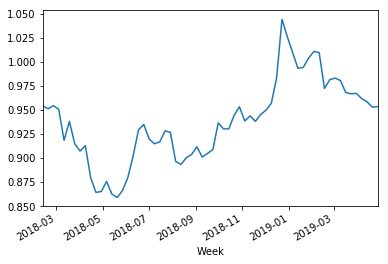

In [0]:
portfolios=weekly_portfolio_returns['Weekly Returns'].unstack()
long_weight=0.50
long_short=(long_weight*portfolios[5.0] + (1-long_weight)*(portfolios[1.0]*-1))
(1+long_short).cumprod().plot()

In [0]:
portfolios=weekly_portfolio_returns['Weekly Returns'].unstack()
portfolios-weekly_portfolio_returns['Weekly Returns']
portfolios

Portfolio,1.0,2.0,3.0,4.0,5.0
Week,,,,,
2018-02-11,0.009384,-0.024685,-0.045923,-0.063994,-0.082163
2018-02-18,0.014122,0.020110,0.031564,0.052238,0.008212
2018-02-25,0.001333,-0.009679,0.010139,0.016373,0.008112
2018-03-04,0.002637,-0.023137,-0.012859,-0.004202,-0.005579
2018-03-11,0.086149,0.020091,0.020327,0.007497,0.018467
2018-03-18,0.017989,-0.016737,-0.006070,0.006856,0.060824
2018-03-25,-0.017524,-0.004582,-0.030493,-0.056614,-0.066782
2018-04-01,0.015265,0.015314,0.002199,0.007207,-0.001598
2018-04-08,-0.018881,-0.008555,-0.001839,-0.004028,-0.006310


##### Drawdowns: A Measure of Loss & Duration of Loss - NOTE: This has been moved to later unit

In [0]:
#Maximum drawdown: worst-case (historical) possibility
#Maximum drawdown: If you invested at any given point, what's the maximum you could lose?

#Drawdown for the S&P 500
returns=sp500.sort_index().pct_change().fillna(0)
(1+returns).cumprod().plot()
cumulative_returns=(1+returns).cumprod()
running_maximum_value=np.maximum.accumulate(cumulative_returns)
underwater=cumulative_returns/running_maximum_value - 1
underwater.plot()

print('Maximum Drawdown: ', underwater.min(), underwater.idxmin())

TypeError: ignored

#### Comparing Risk and Return Among Portfolios 

In [0]:
cumulative_returns=(1+weekly_portfolio_returns.groupby(level=1)['Weekly Returns'].cumsum()).unstack()
cumulative_returns.head()

Portfolio,1.0,2.0,3.0,4.0,5.0
Week,,,,,
2018-02-11,1.009384,0.975315,0.954077,0.936006,0.917837
2018-02-18,1.023505,0.995426,0.985641,0.988244,0.926049
2018-02-25,1.024838,0.985747,0.995780,1.004617,0.934161
2018-03-04,1.027475,0.962610,0.982921,1.000415,0.928582
2018-03-11,1.113624,0.982701,1.003247,1.007911,0.947048


In [0]:
weekly_portfolio_returns = weekly_portfolio_returns.rename_axis(['Weeks','Portfolios'])
piv_cumulative_returns =(1+weekly_portfolio_returns.pivot_table(index='Weeks', columns = 'Portfolio')).cumsum()
piv_cumulative_returns.head()

Weekly Returns                                        
Portfolio             1.0       2.0       3.0       4.0       5.0
Weeks                                                            
2018-02-11       1.009384  0.975315  0.954077  0.936006  0.917837
2018-02-18       2.023505  1.995426  1.985641  1.988244  1.926049
2018-02-25       3.024838  2.985747  2.995780  3.004617  2.934161
2018-03-04       4.027475  3.962610  3.982921  4.000415  3.928582
2018-03-11       5.113624  4.982701  5.003247  5.007911  4.947048

In [0]:
weekly_portfolio_returns = weekly_portfolio_returns.rename_axis(['Week','Portfolio'])

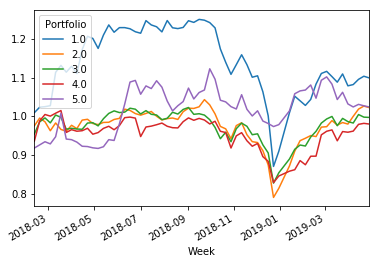

In [0]:
cumulative_returns.plot()

In [0]:
#Plot Monthly, Annual Total, Returns and show the resulting data (in dataframe)
first_of_month_ret=cumulative_returns.groupby([(cumulative_returns.index.year), (cumulative_returns.index.month)]).first()
last_of_month_ret=cumulative_returns.groupby([(cumulative_returns.index.year), (cumulative_returns.index.month)]).last()

monthly_returns=(last_of_month_ret/first_of_month_ret-1)

monthly_returns.index.names = ['Year', 'Month']
monthly_returns.head()

Portfolio        1.0       2.0       3.0       4.0       5.0
Year Month                                                  
2018 2      0.015311  0.010695  0.043711  0.073302  0.017785
     3      0.084297 -0.001276 -0.016519 -0.042244  0.013470
     4      0.063683  0.004647  0.015014 -0.012122 -0.022479
     5      0.035615  0.013492  0.039765  0.007667  0.022475
     6     -0.008668  0.012370  0.008669  0.019823  0.114684

([<matplotlib.axis.XTick at 0x7f3ee0b97ac8>,
 <a list of 5 Text xticklabel objects>)

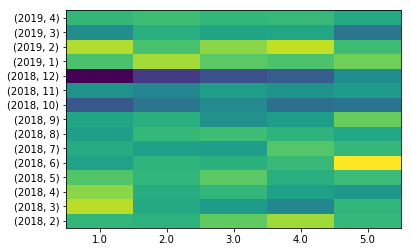

In [0]:
#Heatmap of Monthly Returns
plt.pcolor(monthly_returns)
plt.yticks(np.arange(0.5, len(monthly_returns.index),1), monthly_returns.index)
plt.xticks(np.arange(0.5, len(monthly_returns.columns), 1), monthly_returns.columns)


In [0]:
#Plot Monthly, Annual Total, Returns and show the resulting data (in dataframe)
first_of_month_ret=cumulative_returns.groupby([(cumulative_returns.index.year), (cumulative_returns.index.month)]).first()
last_of_month_ret=cumulative_returns.groupby([(cumulative_returns.index.year), (cumulative_returns.index.month)]).last()

monthly_returns=(last_of_month_ret/first_of_month_ret-1)

monthly_returns.index.names = ['Year', 'Month']
monthly_returns.head()

first_of_year_ret=cumulative_returns.groupby([(cumulative_returns.index.year)]).first()
last_of_year_ret=cumulative_returns.groupby([(cumulative_returns.index.year)]).last()

annual_returns=(last_of_year_ret/first_of_year_ret-1)
annual_returns.index.names = ['Year']
annual_returns

Portfolio,1.0,2.0,3.0,4.0,5.0
Year,,,,,
2018,-0.098821,-0.165737,-0.105005,-0.096671,0.065992
2019,0.089270,0.173198,0.120964,0.142152,0.010089


Text(0, 0.5, 'Year')

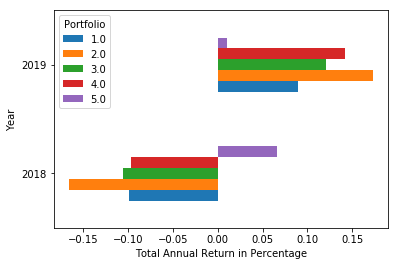

In [0]:
returns_plot = annual_returns.plot(kind='barh')
returns_plot.set_xlabel("Total Annual Return in Percentage")
returns_plot.set_ylabel("Year")

In [0]:
weekly_portfolio_returns=weekly_portfolio_returns['Weekly Returns'].unstack()
weekly_portfolio_returns

Portfolio,1.0,2.0,3.0,4.0,5.0
Week,,,,,
2018-02-11,0.009384,-0.024685,-0.045923,-0.063994,-0.082163
2018-02-18,0.014122,0.020110,0.031564,0.052238,0.008212
2018-02-25,0.001333,-0.009679,0.010139,0.016373,0.008112
2018-03-04,0.002637,-0.023137,-0.012859,-0.004202,-0.005579
2018-03-11,0.086149,0.020091,0.020327,0.007497,0.018467
2018-03-18,0.017989,-0.016737,-0.006070,0.006856,0.060824
2018-03-25,-0.017524,-0.004582,-0.030493,-0.056614,-0.066782
2018-04-01,0.015265,0.015314,0.002199,0.007207,-0.001598
2018-04-08,-0.018881,-0.008555,-0.001839,-0.004028,-0.006310


In [0]:
weekly_portfolio_returns = weekly_portfolio_returns.rename_axis(['Weeks','Portfolios'])
piv_weekly_returns = weekly_portfolio_returns.pivot_table(index='Weeks', columns = 'Portfolio')
piv_weekly_returns.head()

Weekly Returns                                        
Portfolio             1.0       2.0       3.0       4.0       5.0
Weeks                                                            
2018-02-11       0.009384 -0.024685 -0.045923 -0.063994 -0.082163
2018-02-18       0.014122  0.020110  0.031564  0.052238  0.008212
2018-02-25       0.001333 -0.009679  0.010139  0.016373  0.008112
2018-03-04       0.002637 -0.023137 -0.012859 -0.004202 -0.005579
2018-03-11       0.086149  0.020091  0.020327  0.007497  0.018467

In [0]:
weekly_portfolio_returns = weekly_portfolio_returns.rename_axis(['Week','Portfolio'])

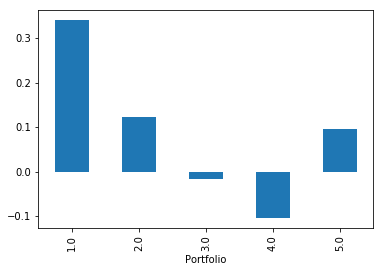

In [0]:

#Annual Sharpe
sharpe_ratios=( (weekly_portfolio_returns.mean()*52)
        / (weekly_portfolio_returns.std()*np.sqrt(52))   )
sharpe_ratios.plot(kind='bar')


In [0]:
weekly_portfolio_returns.std()

Portfolio
1.0     0.054488
2.0     0.030657
3.0     0.026538
4.0     0.019341
5.0     0.016804
6.0     0.016358
7.0     0.018015
8.0     0.019182
9.0     0.024994
10.0    0.049640
dtype: float64

Portfolio,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Year,,,,,,,,,,
2018,-0.241230,-0.262371,0.105962,-0.010438,-0.078638,-0.079914,-0.089029,-0.099311,-0.020118,-0.434883
2019,0.238077,0.339998,0.113657,0.086003,0.040626,-0.011415,0.078147,0.002589,0.083664,0.094921


In [0]:
annual_std = weekly_portfolio_returns.std()*np.sqrt(52) #Standard Deviation of Cumulative Returns
annual_std.index = annual_std.index.astype(int)
table = pd.DataFrame()
table['Average Annual Return']=weekly_portfolio_returns.mean()*52
table['Annual Standard Deviation'] = annual_std
table['Sharpe Ratio'] = sharpe_ratios

table.index.name = 'Portfolio'
table

,Average Annual Return,Annual Standard Deviation,Sharpe Ratio
Portfolio,,,
1.0,0.190265,0.392922,0.484233
2.0,0.034459,0.221069,0.155872
3.0,0.220152,0.191371,1.150391
4.0,0.066361,0.139471,0.475805
5.0,-0.044828,0.121174,-0.369946
6.0,-0.095181,0.117956,-0.806922
7.0,-0.026407,0.129908,-0.203274
8.0,-0.098979,0.138327,-0.715543
9.0,0.003894,0.180237,0.021602


##### Reporting:  Pandas.to_excel  

In [0]:
https://github.com/quantopian/pyfolio
    
#Most of the functions appear to be here:
https://github.com/quantopian/pyfolio/blob/master/pyfolio/timeseries.py

SyntaxError: invalid syntax (<ipython-input-35-11144f7fd5bc>, line 1)